# Laboratorio 6 (FIFA) - Inteligencia Artificial
Autores: Stefano Aragoni, Carol Arévalo, Luis Santos

### Task 1.0: Exploración y Limpieza de Datos
Como primer paso, se importa el archivo a través de distintas librerías. 

In [184]:
# Importar librerías 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Cargar el dataset
data = pd.read_csv('fifa.csv')

# Imprimir las primeras 5 filas
data.head()

C:\Users\carev\AppData\Local\Temp\ipykernel_303852\3955392050.py:13: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('fifa.csv')


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Datos Faltantes
En este caso, primero se analizó si hacían falta datos en el dataset. En este caso, sí existen datos faltantes.

Index(['Club', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM',
       'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM',
       'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

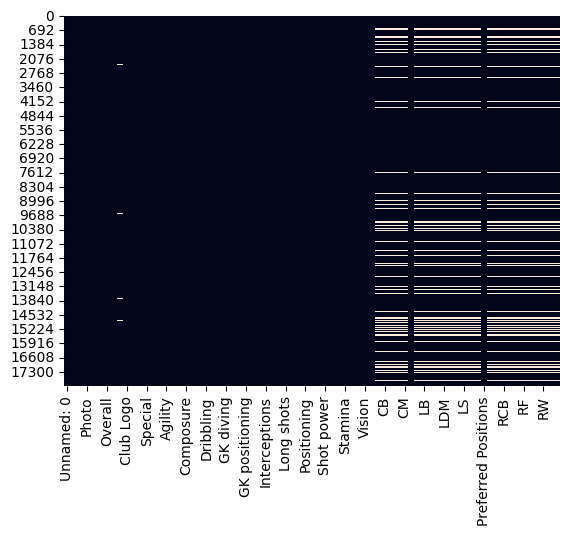

In [185]:
# Matriz de datos faltantes
sns.heatmap(data.isnull(), cbar=False)

# Mostrar columnas con datos faltantes, o con datos fuera de lugar (como un string en columna numérica)
data.columns[data.isnull().any()]

In [186]:
for col in data.columns[data.isnull().any()]:

    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        data[col].fillna(data[col].mean(), inplace=True)

    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

data.columns[data.isnull().any()]

Index([], dtype='object')

In [187]:
#borrar datos innecesarios
data.drop(['Photo', 'Nationality', 'Flag','Club Logo' ], axis=1, inplace=True)


data.head()

,Unnamed: 0,Name,Age,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,94,94,Real Madrid CF,€95.5M,€565K,2228,89,...,61.000000,53.000000,82.000000,62.000000,91.000000,89.000000,92.00000,91.000000,66.000000,92.00000
1,1,L. Messi,30,93,93,FC Barcelona,€105M,€565K,2154,92,...,57.000000,45.000000,84.000000,59.000000,92.000000,90.000000,88.00000,91.000000,62.000000,88.00000
2,2,Neymar,25,92,94,Paris Saint-Germain,€123M,€280K,2100,94,...,59.000000,46.000000,79.000000,59.000000,88.000000,87.000000,84.00000,89.000000,64.000000,84.00000
3,3,L. Suárez,30,92,92,FC Barcelona,€97M,€510K,2291,88,...,64.000000,58.000000,80.000000,65.000000,88.000000,85.000000,88.00000,87.000000,68.000000,88.00000
4,4,M. Neuer,31,92,92,FC Bayern Munich,€61M,€230K,1493,58,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.20405,59.359265,57.698721,58.20405


##### Encoding
Convertir variables que no son numéricas a numéricas

In [188]:

#quitar las columnas que empiezan con 'http'
data = data.loc[:, ~data.columns.str.startswith('http')]


# borrar columnas
data.drop(['Value', 'Wage', 'CAM','CB','CDM','CF','CM','ID','LAM','LB','LCB','LCM','LDM','LF','LM','LS','LW','LWB','Preferred Positions','RAM','RB','RCB','RCM','RDM','RF','RM','RS','RW','RWB','ST','Volleys','Vision', 'Strength', 'Age', 'Special', 'Composure', 'Crossing', 'Curve'], axis=1, inplace=True)

# recorrer todas las columnas y convertirlas a string
for col in data.columns:
    data[col] = data[col].astype(str)

# try catch para convertir a numérico 
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col])
    except:
        pass

# Pasar todas las que no sean numéricas a dummy 
data_dummies = pd.get_dummies(['Overall','Club','Acceleration','Aggression','Agility','Balance','Ball control','Dribbling','Finishing','Free kick accuracy','GK diving','GK handling','GK kicking','GK positioning','GK reflexes','Heading accuracy','Interceptions','Jumping','Long passing','Long shots','Marking','Penalties','Positioning','Reactions','Short passing','Shot power','Sliding tackle','Sprint speed','Stamina','Standing tackle'])

#concatenar columnas dummy con el dataset
data = pd.concat([data['Potential'], data_dummies], axis=1)

#print head
print(data.head)


<bound method NDFrame.head of       Potential  Acceleration  Aggression  Agility  Balance  Ball control  \
0            94           0.0         0.0      0.0      0.0           0.0   
1            93           0.0         0.0      0.0      0.0           0.0   
2            94           1.0         0.0      0.0      0.0           0.0   
3            92           0.0         1.0      0.0      0.0           0.0   
4            92           0.0         0.0      1.0      0.0           0.0   
...         ...           ...         ...      ...      ...           ...   
17976        63           NaN         NaN      NaN      NaN           NaN   
17977        46           NaN         NaN      NaN      NaN           NaN   
17978        61           NaN         NaN      NaN      NaN           NaN   
17979        64           NaN         NaN      NaN      NaN           NaN   
17980        64           NaN         NaN      NaN      NaN           NaN   

       Club  Dribbling  Finishing  Free kick 

##### Escalar
En este caso, se utilizó la librería de SKLearn para poder escalar y normalizar los datos que lo necesitaran. Asimismo, también se hizo un análisis pre y post escalamiento para determinar la distribución de los datos. En el preprocesamiento, se podía observar cómo ciertas variables tenían una alta desviación estándar a comparación de su respectiva media. Esto fue solucionado a través de la función de StandardScaler(). 

> Asimismo, es importante mencionar que la normalización de datos es importante para, según Microsoft, "tener datos que usan una escala común, sin distorsionar las diferencias en los intervalos de valores ni perder información". https://learn.microsoft.com/es-es/azure/machine-learning/component-reference/normalize-data

Para otros modelos, la normalización de datos permite asegurar que las variables tengan en mismo peso y que no se le de prioridad a una ni a otra. Esto considerando que otros modelos normalmente toman en cuenta distancias, por ejemplo. En este caso, esto no es necesario. Sin embargo, aún se normalizó para darle continuidad a los datos.  


In [189]:
# Calcular media y desviación estándar de cada columna
print('\n\nMedia y desviación estándar de cada columna:')
data.describe()



Media y desviación estándar de cada columna:


,Acceleration,Aggression,Agility,Balance,Ball control,Club,Dribbling,Finishing,Free kick accuracy,GK diving,...,Overall,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
std,0.182574,0.182574,0.182574,0.182574,0.182574,0.182574,0.182574,0.182574,0.182574,0.182574,...,0.182574,0.182574,0.182574,0.182574,0.182574,0.182574,0.182574,0.182574,0.182574,0.182574
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [190]:
# imprimir potential
data['Potential'].value_counts()    

# Libreía para escalar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('Potential'))

# Escalar los datos
scaled_features = scaler.transform(data.drop('Potential',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])

# Agregar la columna de status
df_feat['Potential'] = data['Potential']

df_feat.head()

KeyError: "['Potential'] not found in axis"

##### Selección de Variables

Finalmente, se quiso determinar la correlacion entre las variables con Potential para poder elegir las variables que se utilizarán en el modelo. Esto es importante ya que cabe destacar que no todas las variables son útiles, y que pueden existir algunas que únicamente causen ruido. A continuación, como se puede observar, las variables que más correlación tienen con un equipo ganando o perdiendo son:

1. blueTotalJungleMinionsKilled
2. blueGoldDiff
3. blueCSPerMin
4. blueTowersDestroyed
5. blueAvgLevel

En este caso se utilizarán las variables que presentan una correlación positiva.

In [ ]:
# Correlación entre las columnas y el status
df_feat.corr()['Potential'].sort_values()

In [ ]:
# Eliminar las columnas con correlación menor a 0.35
variables = df_feat.corr()['blueWins'].sort_values().index
variables = variables[df_feat.corr()['blueWins'].sort_values() > 0.36]

# Imprimir las columnas que se van a usar
print('Columnas a usar:\n',variables)

# Eliminar las columnas que no se van a usar
df_feat = df_feat[variables]

----------
### Task 1.1: Clasificación de Partidas de League of Legends


En este caso, se creó un algoritmo de KNN con las siguientes consideraciones.
1. Divida el dataset en 80% para entrenamiento, 10% para validación (tuning) y 10% para test
2. Recuerde que su variable objetivo es “blueWins”
3. Provea una métrica de desempeño, justificando su elección
> Para medir el desempeño del modelo creado, se utilizó una matríz de confusión y la calificación de exactitud del modelo. Cada uno de estos dos valores son importantes para evaluar el modelo, ya que permite analizar diferentes aspectos de este. La calificación de exactitud es un valor único que califica que tanto se parecen los valores calculados por el modelo con los valores esperados. En otras palabras, es el porcentaje de predicciones que el modelo obtuvo correctos. Cabe destacar que esta métrica funciona ya que los datos están balanceados, sino no sería válida su implementación. 

> Ademas de la calificación de exactitud, se utiliza una matríz de confusión para analizar los valores correctos, los falsos positivos, y los falsos negativos. En esta matriz, se observan cuatro valores almacenados en una matríz de dos por dos. En la primera fila, se muestran la cantidad de verdaderos positivos y falsos positivos. En la segunda fila, se muetran la cantidad de falsos positivos y verdaderos negativos. Esta matríz es importante porque resume los resultados de una predicción en un problema de clasificación. Adicionalmente, permite calcular otras métricas de desempeño como la calificación de exactitud.

4. ¿Qué métrica usaron para seleccionar los features?
> La métrica que se utilizó para seleccionar los features, como 'blueAvgLevel', fue el porcentaje de correlación de los features con 'blueWins'. Esto debido a que dichas métricas son las que tienen la mayor relación con la variable objetivo y son capaces de indicar con menos ruido si un juego fue ganado o no.
5. Especifique cuales son los features (columnas del dataset) que mayor importancia tomaron en la construcción del árbol (top 5)
> blueTotalJungleMinionsKilled, blueGoldDiff, blueCSPerMin, blueTowersDestroyed, blueAvgLevel
6. Si experimentan overfitting, ¿qué técnica usaron para minimizarlo?
7. Mencione, como comentario que variables tuvieron que hacer tunning y cualquier otra consideración extra que tuvieron que tomar en cuenta

In [ ]:
# Dividir los datos en entrenamiento (80%) y test (20%)
X_train, X_test_val, y_train, y_test_val = train_test_split(df_feat.drop('blueWins',axis=1), df_feat['blueWins'], test_size=0.20)

# Dividir los datos de test en 10% y 10% con valdiación
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

# Comprobar tamaño de los datos
print('Tamaño de los datos de entrenamiento:',X_train.shape)
print('Tamaño de los datos de validación:',X_val.shape)
print('Tamaño de los datos de test:',X_test.shape)

#### Task 1.1.2: Árbol de Decisión con SKLearn
En este caso, se repitió el mismo procedimiento pero esta vez se utilizó la librería de SKLearn para realizar el respectivo modelo. En este caso, ambos presentaros resultados iguales... sin embargo, SKLearn es capaz de hacer los cálculos de manera más rápida. 

Como primer caso, se utilizó GridSearch y Cross Validation para determinar los mejores parámetros. Estos siendo:
> {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
# Arbol de Decision con sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# hiperparámetros para tunning
params = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'max_features': [None, 'sqrt', 'log2']}

# Crea el modelo
dt = DecisionTreeClassifier()

# Crea el modelo con grid search cross-validation
gs = GridSearchCV(dt, params, cv=5)

# Entrenar el modelo
gs.fit(X_val, y_val)

# Imprimir los mejores parámetros
print('Mejores parámetros:',gs.best_params_)

En base a los mejores parámetros previamente calculados, se realiza el modelo correspondiente con SKLearn. Como se puede observar, se obtuvo una exactitud de 0.74. No se cuenta con overfitting.

In [ ]:
# Hacer modelo con los mejores parámetros
dt = DecisionTreeClassifier(**gs.best_params_, random_state=10)

# Entrenar el modelo
dt.fit(X_train, y_train)

# Hacer predicciones
predictions = dt.predict(X_test)

# Calcular accuracy
print('Accuracy:',accuracy_score(y_test, predictions))

# Calcular la matriz de confusión
print('\nMatriz de confusión:\n', confusion_matrix(y_test, predictions))

# Top 5 varibles del arbol

